<hr>  

#### About this document
_This is the assignment for the UCL CASA module Data Science for Spatial Systems (CASA0006) <br>This is a self contained Jupyter notebook with structure introduction, discussion and embeded code and bibliography._
<br>

**Code is hosted [here](https://github.com/X-Fan-Jack/Study_Notes/blob/master/Coursework/CASA06/cw_casa06.ipynb)**<br>

**Data is availble [here](https://github.com/X-Fan-Jack/Study_Notes/tree/master/Coursework/CASA06/data)**<br>

<hr>

# Analysis and prediction of regional demand for taxis based on spatiotemporal sequence data: 
_the case of the New York City_  

This paper explores trip record data from the TLC in New York City, and based on the city's provided geographic boundaries, obtains temporal characteristics of demand relationships at the district level.  
It emphasizes the analysis of the changes in cab demand in each region over time to ultimately obtain a model that can predict changes in demand.


<hr>

# Guide
- [Passenger Behavior Patterns Based on Spatio-Temporal Sequences of Taxi Trajectory Data:](#passenger-behavior-patterns-based-on-spatio-temporal-sequences-of-taxi-trajectory-data-)
  * [1 Introduction](#1-introduction)
    + [1.1 Background](#11-background)
    + [1.2 Research question](#12-research-question)
    + [1.3 Requirements to run the analysis](#13-requirements-to-run-the-analysis)
  * [2 Literature Review](#2-literature-review)
  * [3 Presentation of data](#3-presentation-of-data)
  * [4 Methodology](#4-methodology)
  * [5 Analysis](#5-analysis)
  * [6 Results](#6-results)
  * [7 Discussion](#7-discussion)
  * [8 Conclusion](#8-conclusion)
  * [Bibliography](#bibliography)
  * [Appendix](#appendix)


## 1 Introduction

### 1.1 Background  

需要改————  
Taxis are an important means of transportation in urban areas, and accurately predicting taxi demand is essential for optimizing urban traffic and planning travel routes. In this study, we used trip data from taxis in New York City and applied spatial and temporal analysis methods to analyze and predict taxi demand in different regions of the city. By comparing three commonly used prediction algorithms, we identified the best model and used it to predict the trend of taxi demand for the next year. The results of this study can help optimize urban transportation planning and travel services, and improve the efficiency and convenience of urban travel.


### 1.2 Research question  
The aim of this research is to analyze the spatiotemporal characteristics of taxi demand in different regions based on the time series data of New York City's taxi trips, and use machine learning algorithms to make predictions, in order to provide decision support for urban transportation planning and taxi service optimization. Specifically, our research question is: How to analyze the spatiotemporal characteristics of taxi demand in different regions based on the time series data of New York City's taxi trips, and use machine learning algorithms to predict the future changes in taxi demand in each region?

### 1.3 Requirements to run the analysis

An overview of packages used to run the analysis with brief explanation of their role.

In [1]:
import pyarrow.parquet as pq
import pandas as pd
import numpy as np
import glob
import geopandas as gpd
import matplotlib.pyplot as plt

<hr>

## 2 Literature Review  

<hr>

## 3 Presentation of data 

数据描述，
TLC将纽约市分为了六个大区，263个小区。其中表现如下。放一张地图吧。

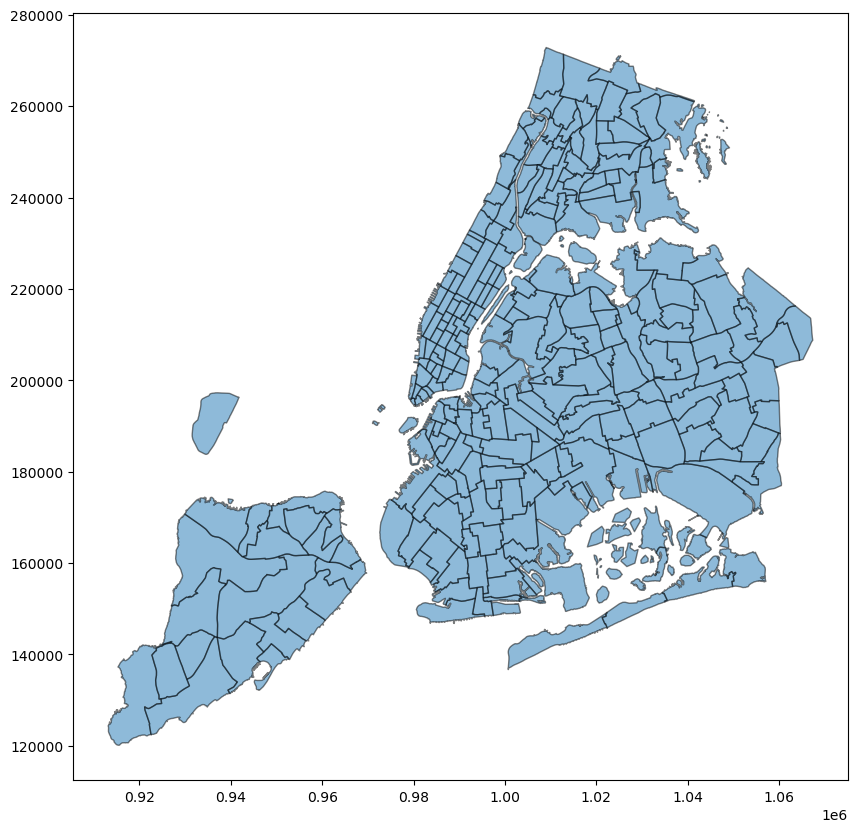

In [2]:
# 读取shapefile文件
shp_file = 'data/taxi_zones/taxi_zones.shp'
map_df = gpd.read_file(shp_file)

# 绘制地图
fig, ax = plt.subplots(figsize=(10,10))
map_df.plot(ax=ax, alpha=0.5, edgecolor='k')
plt.show()

<hr>

## 4 Methodology 

<hr>

## 5 Analysis

In [3]:
# 指定要读取的文件路径
file_path = "data/FHV_data/fhv_tripdata_*.parquet"


# 获取匹配的文件路径列表
file_list = glob.glob(file_path)

# 读取每个文件的数据，并合并为一个DataFrame
df_list = []
for file in file_list:
    table = pq.read_table(file)
    df_list.append(table.to_pandas())
    
df = pd.concat(df_list)

In [4]:
df.info()
df.head(5)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45376714 entries, 0 to 1114319
Data columns (total 7 columns):
 #   Column                  Dtype         
---  ------                  -----         
 0   dispatching_base_num    object        
 1   pickup_datetime         datetime64[ns]
 2   dropOff_datetime        datetime64[ns]
 3   PUlocationID            float64       
 4   DOlocationID            float64       
 5   SR_Flag                 object        
 6   Affiliated_base_number  object        
dtypes: datetime64[ns](2), float64(2), object(3)
memory usage: 2.7+ GB


,dispatching_base_num,pickup_datetime,dropOff_datetime,PUlocationID,DOlocationID,SR_Flag,Affiliated_base_number
0,B00001,2020-01-01 00:30:00,2020-01-01 01:44:00,264.0,264.0,None,B00001
1,B00001,2020-01-01 00:30:00,2020-01-01 00:47:00,264.0,264.0,None,B00001
2,B00009,2020-01-01 00:48:00,2020-01-01 01:19:00,264.0,264.0,None,B00009
3,B00009,2020-01-01 00:34:00,2020-01-01 00:43:00,264.0,264.0,None,B00009
4,B00009,2020-01-01 00:23:00,2020-01-01 00:32:00,264.0,264.0,None,B00009


In [5]:
# 除去不需要的列
df_sub = df.drop(columns=['SR_Flag', 'Affiliated_base_number', 'dispatching_base_num'])
# 检查NaN
if df_sub.isnull().values.any():
    print("DataFrame contains NaN values.")
else:
    print("DataFrame does not contain NaN values.")

# 重命名
df_sub = df_sub.rename(columns={'pickup_datetime': 'pickup_datetime', 
                        'dropOff_datetime': 'dropoff_datetime', 
                        'PUlocationID': 'PUlocationID', 
                        'DOlocationID': 'DOlocationID'})
df_sub.info()
df_sub.head()

DataFrame contains NaN values.
<class 'pandas.core.frame.DataFrame'>
Int64Index: 45376714 entries, 0 to 1114319
Data columns (total 4 columns):
 #   Column            Dtype         
---  ------            -----         
 0   pickup_datetime   datetime64[ns]
 1   dropoff_datetime  datetime64[ns]
 2   PUlocationID      float64       
 3   DOlocationID      float64       
dtypes: datetime64[ns](2), float64(2)
memory usage: 1.7 GB


,pickup_datetime,dropoff_datetime,PUlocationID,DOlocationID
0,2020-01-01 00:30:00,2020-01-01 01:44:00,264.0,264.0
1,2020-01-01 00:30:00,2020-01-01 00:47:00,264.0,264.0
2,2020-01-01 00:48:00,2020-01-01 01:19:00,264.0,264.0
3,2020-01-01 00:34:00,2020-01-01 00:43:00,264.0,264.0
4,2020-01-01 00:23:00,2020-01-01 00:32:00,264.0,264.0


In [6]:
# 检查每一列的NaN状态
df_isnull = df_sub.isnull().sum().to_frame(name='num_null_values').rename_axis('column_name').reset_index()
df_isnull = df_isnull.transpose()
df_isnull.head()

,0,1,2,3
column_name,pickup_datetime,dropoff_datetime,PUlocationID,DOlocationID
num_null_values,0,0,27579996,5265371


对于NaN的处理，   
   
如果OD的locationID的NaN处理方式为或,数据留存率为.[0.7589647428166336, 0.17290031620507976, 0.23250138647091056, 0.21057685404551654]   
如果OD的locationID的NaN处理方式为与,数据留存率为. [0.9623456346122385, 0.8619116915502695, 0.8487670331948148, 0.8399355660851461]

In [7]:
# 如果行包含NaN则删除该行
df_clean_or = df_sub.dropna()

# df_clean.info()
# df_clean.head()

# 按年统计数据清洗率
clean_rates = []
for year in df_clean_or['pickup_datetime'].dt.year.unique():
    # 计算每一年的总行数和去除NaN后的行数
    total_count = len(df_sub[df_sub['pickup_datetime'].dt.year == year])
    clean_count = len(df_clean_or[df_clean_or['pickup_datetime'].dt.year == year])
    # 计算比例
    clean_rate = clean_count / total_count
    clean_rates.append(clean_rate)

# 输出结果
print(clean_rates)

[0.7589647428166336, 0.17290031620507976, 0.23250138647091056, 0.21057685404551654]


In [11]:
# 如果PUlocationID、DOlocationID中所有元素都为NaN，则删除该行。
df_clean_and = df_sub.dropna(subset=['PUlocationID', 'DOlocationID'], how='all')

# 按年统计数据清洗率
clean_rates = []
for year in df_clean_and['pickup_datetime'].dt.year.unique():
    # 计算每一年的总行数和去除NaN后的行数
    total_rows = len(df_sub[df_sub['pickup_datetime'].dt.year == year])
    clean_rows = len(df_clean_and[df_clean_and['pickup_datetime'].dt.year == year])
    # 计算比例
    clean_rate = clean_rows / total_rows
    clean_rates.append(clean_rate)

print(clean_rates)

[0.9623456346122385, 0.8619116915502695, 0.8487670331948148, 0.8399355660851461]


不同数据清洗方案的数据留存率比较图

In [12]:
df_clean_or_grouped = df_clean_or.groupby(df_clean_or['pickup_datetime'].dt.strftime('%Y-%m')).size()

In [13]:
df_clean_and_grouped = df_clean_and.groupby(df_clean_and['pickup_datetime'].dt.strftime('%Y-%m')).size()

In [14]:
df_sub_grouped = df_sub.groupby(df_sub['pickup_datetime'].dt.strftime('%Y-%m')).size()

In [17]:
df_sub_grouped.head()

pickup_datetime
2020-01    2028587
2020-02    1913495
2020-03    1441864
2020-04     566426
2020-05     774970
dtype: int64

In [18]:
type(df_sub_grouped)

pandas.core.series.Series

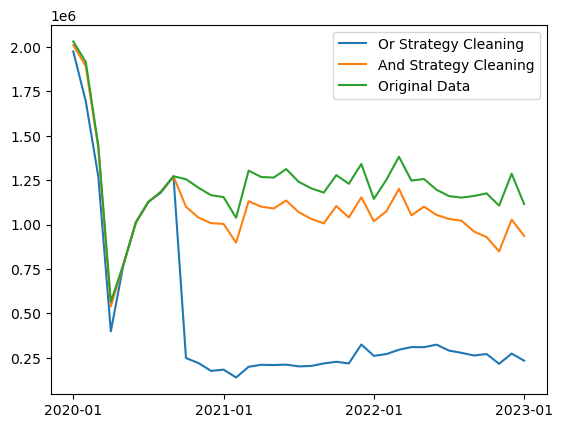

In [58]:
# 绘制折线图
plt.plot(df_clean_or_grouped.index, df_clean_or_grouped, label='Or Strategy Cleaning')
plt.plot(df_clean_and_grouped.index, df_clean_and_grouped, label='And Strategy Cleaning')
plt.plot(df_sub_grouped.index, df_sub_grouped, label='Original Data')

# x轴只显示每一年的第一个月
year_starts = df_sub_grouped[df_sub_grouped.index.str.endswith('-01')].index
plt.xticks(year_starts)

plt.legend()
plt.show()

In [62]:
# 按年份拆分数据
df_clean_or_yearly = [g for n, g in df_clean_or.groupby(pd.Grouper(key='pickup_datetime', freq='Y'))]
df_clean_and_yearly = [g for n, g in df_clean_and.groupby(pd.Grouper(key='pickup_datetime', freq='Y'))]
df_sub_yearly = [g for n, g in df_sub.groupby(pd.Grouper(key='pickup_datetime', freq='Y'))]

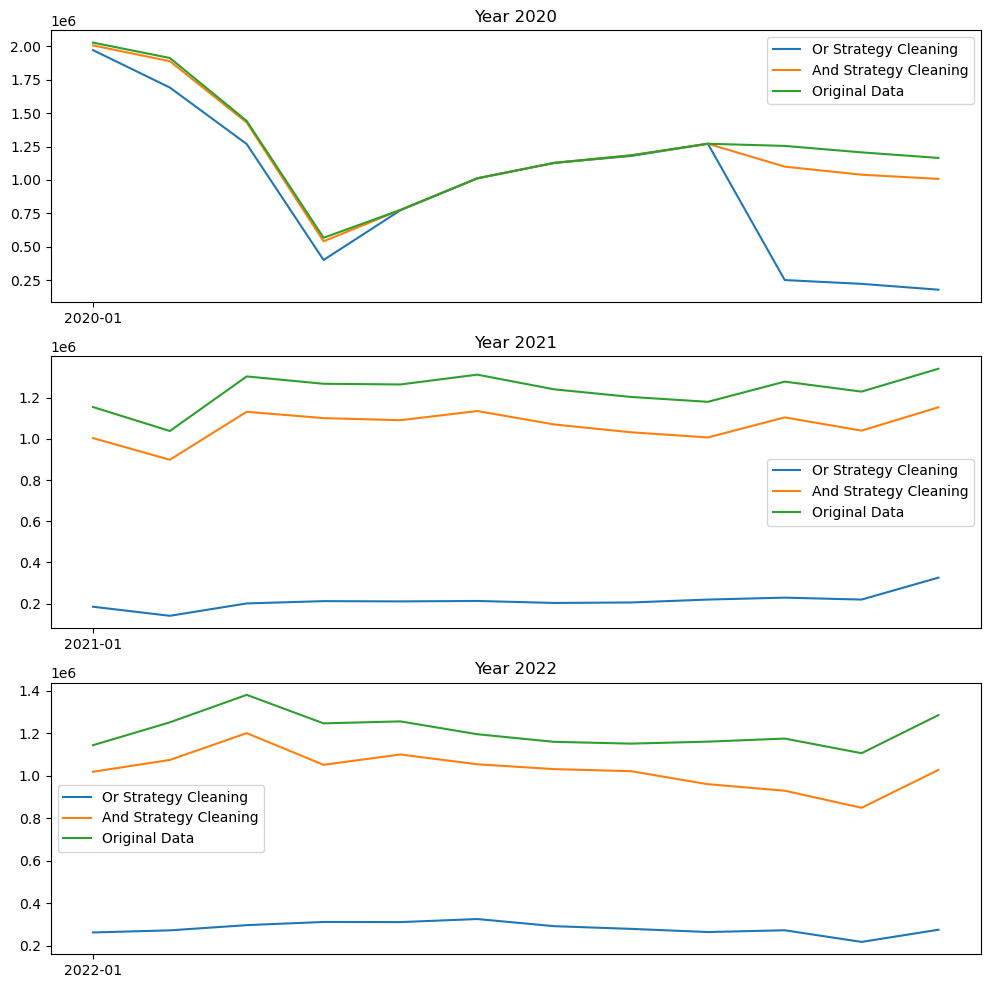

In [61]:
# 绘制三个折线图，每个折线图包含三条折线
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(12, 12))

for i, year in enumerate(['2020', '2021', '2022']):
    # 提取当前年份的数据
    df_clean_or_grouped = df_clean_or_yearly[i].groupby(df_clean_or_yearly[i]['pickup_datetime'].dt.strftime('%Y-%m')).size()
    df_clean_and_grouped = df_clean_and_yearly[i].groupby(df_clean_and_yearly[i]['pickup_datetime'].dt.strftime('%Y-%m')).size()
    df_sub_grouped = df_sub_yearly[i].groupby(df_sub_yearly[i]['pickup_datetime'].dt.strftime('%Y-%m')).size()
    
    # 绘制当前年份的折线图
    axes[i].plot(df_clean_or_grouped.index, df_clean_or_grouped, label='Or Strategy Cleaning')
    axes[i].plot(df_clean_and_grouped.index, df_clean_and_grouped, label='And Strategy Cleaning')
    axes[i].plot(df_sub_grouped.index, df_sub_grouped, label='Original Data')
    
    # 添加图例和标题
    axes[i].legend()
    axes[i].set_title(f'Year {year}')
    
    # 设置x轴只显示每年的第一个月
    axes[i].set_xticks(df_clean_or_grouped.index[::12])
    
# 显示图形
plt.show()

从原始数据的角度出发，20年的出租车使用量有大幅度的下降。若不考虑数据采集本身造成的系统误差的情况下，造成这种结果的主要原因应该为新冠疫情的爆发。

<hr>

## 6 Results

<hr>

## 7 Discussion

<hr>

## 8 Conclusion

<hr>

## Bibliography

<hr>

## Appendix